In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('spotify-2023.csv', encoding='cp1251')

print(data.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

1. Побудувати горизонтальну стовпчикову діаграму для 10 найпопулярніших пісень

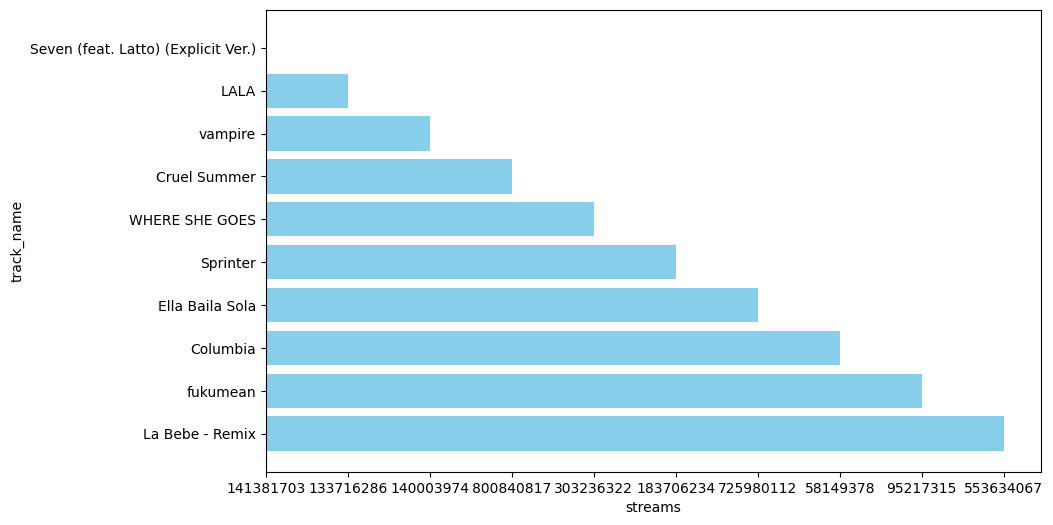

In [27]:
top_10_songs = data.head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_10_songs['track_name'], top_10_songs['streams'], color='skyblue')
plt.xlabel('streams')
plt.ylabel('track_name')
plt.gca().invert_yaxis()
plt.show()

Побудувати кругову діаграму для тих самих даних

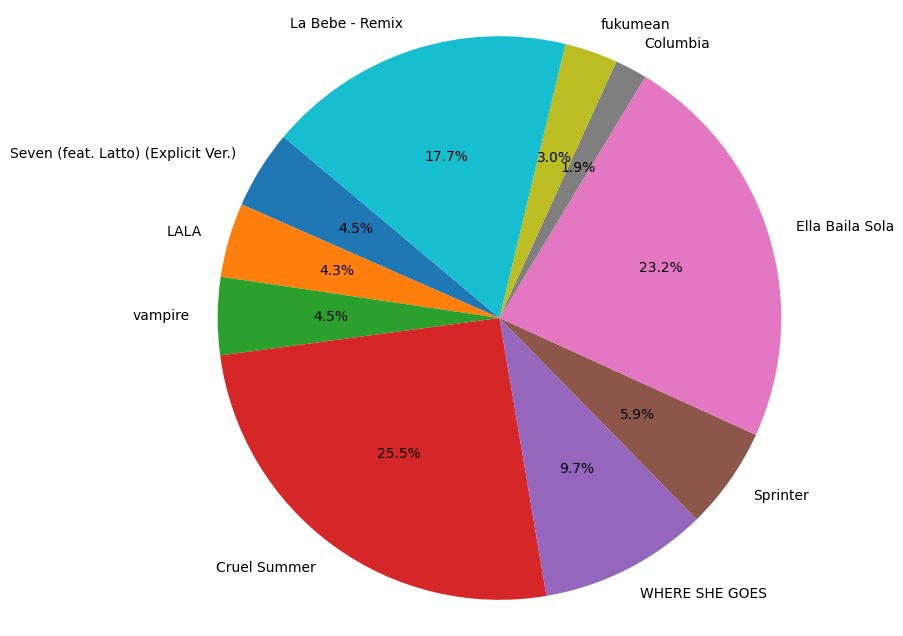

In [28]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_songs['streams'], labels=top_10_songs['track_name'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

 2. Створіть кругову діаграму розподілу за danceability серед найпопулярніших пісень у 2023 році

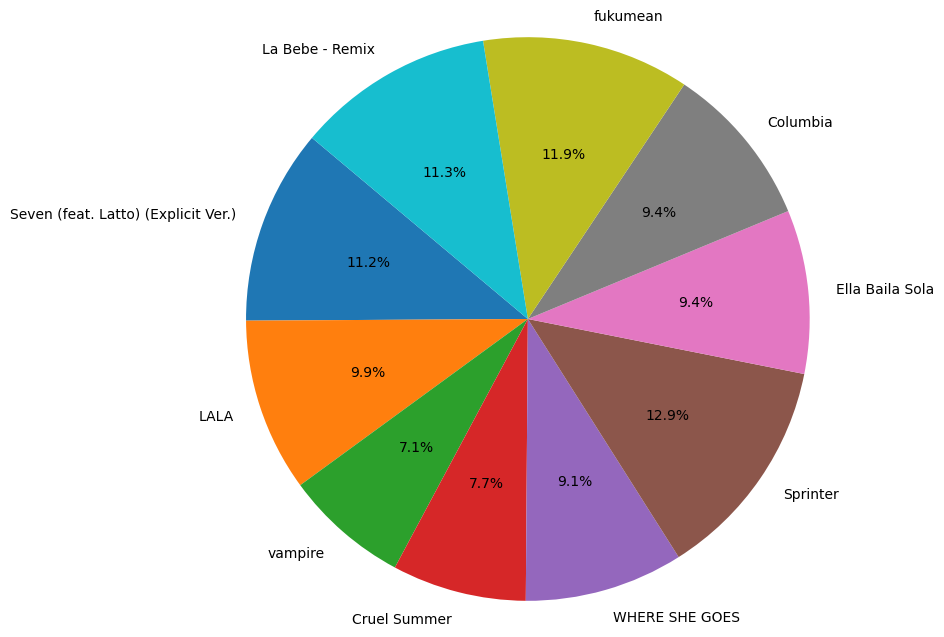

In [29]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_songs['danceability_%'], labels=top_10_songs['track_name'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

3. Побудуйте лінійний графік змін кількості прослуховувань певного треку протягом року 2023 року

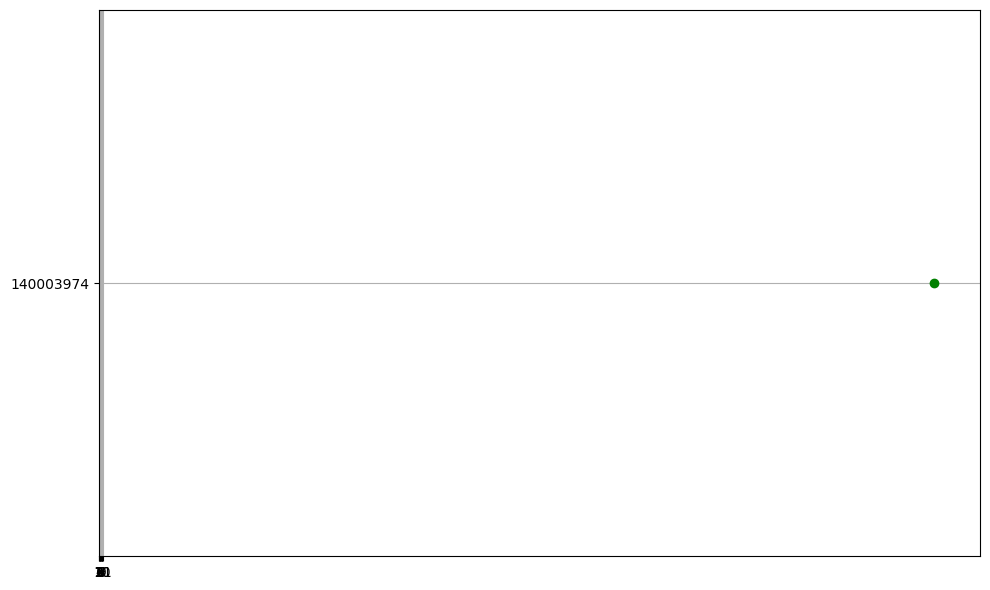

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

track_name = "vampire"
track_data = data[data['track_name'] == track_name]

plt.figure(figsize=(10, 6))
plt.plot(track_data['released_year'], track_data['streams'], marker='o', color='green', linestyle='-')
plt.grid(True)
plt.xticks(range(1, 12))
plt.tight_layout()
plt.show()

4. Створіть стовпчикову діаграму для 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів

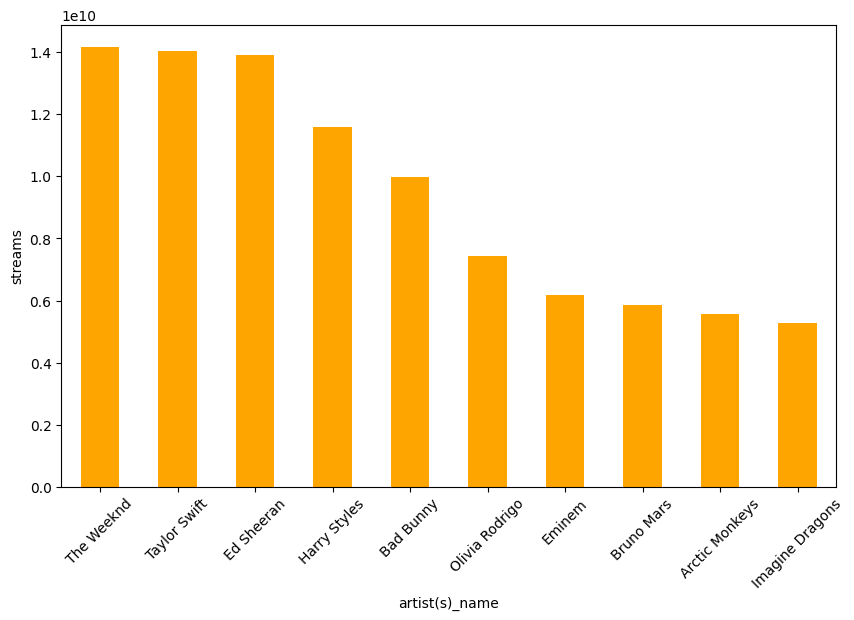

In [33]:
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
top_10_artists = data.groupby('artist(s)_name').sum().nlargest(10, 'streams')['streams']
plt.figure(figsize=(10, 6))
top_10_artists.plot(kind='bar', color='orange')
plt.xlabel('artist(s)_name')
plt.ylabel('streams')
plt.xticks(rotation=45)
plt.show()

5. Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році

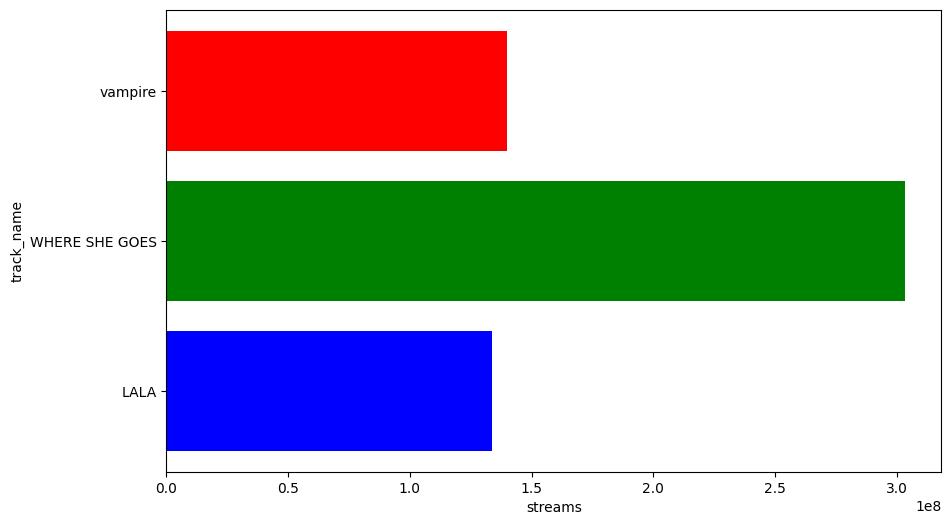

In [35]:
# Наприклад, для трьох конкретних треків 'Track1', 'Track2' та 'Track3':
tracks = ['LALA', 'WHERE SHE GOES', 'vampire']
track_streams = data[data['track_name'].isin(tracks)].pivot_table(index='track_name', values='streams', aggfunc='sum')
plt.figure(figsize=(10, 6))
plt.barh(track_streams.index, track_streams['streams'], color=['blue', 'green', 'red'])
plt.xlabel('streams')
plt.ylabel('track_name')
plt.show()